In [134]:
# SUMMARY
# A - Data load
# B - DATA CHECKS
# C - DATA ENRICHMENTS - match countries & city characteristics
# D - DATA CATEGORISATION - create categories
# E - STATS & CORRELATIONS

In [135]:
# -------------------------------------------- #
# A - Data load
# -------------------------------------------- #

import unicodecsv
import pandas as pd

# function read csv
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

#load CSV as list
people_filename = './data/people.csv'
people = read_csv(people_filename)

people[0]

{'32': '',
 '32.betterworse': 'KO',
 'Age': '30',
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': '0',
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': '10'}

In [136]:
# -------------------------------------------- #
# B - DATA CHECKS
# -------------------------------------------- #
# Part 1 - Look for duplicate in the ref value
print (len(people))
unique_people = set()
duplicate = list()
for person in people:
    if person['REF'] in unique_people:
        duplicate.append(person['REF'])
    unique_people.add(person['REF'])
print (len(unique_people))
print(duplicate)

437
437
[]


In [137]:
# -------------------------------------------- #
# DATA CHECKS
# -------------------------------------------- #
# 2 - Adult / Children

In [138]:
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return 0
    else:
        return int(i)

for person in people:
    person['Age'] = parse_maybe_int(person['Age'])
    person['Number of kids'] = parse_maybe_int(person['Number of kids'])
    person['Years of studies'] = parse_maybe_int(person['Years of studies'])
    
people[0]

{'32': '',
 '32.betterworse': 'KO',
 'Age': 30,
 'Category': 'Adult',
 'Country 1': 'Australia',
 'Country 2': '',
 'Gender': 'F',
 'Job': 'Phd Student',
 'Number of kids': 0,
 'Place of living': 'Sydney',
 'REF': 'AUS001',
 'Type of school': 'Law, Health',
 'Years of studies': 10}

In [139]:
df_people = pd.DataFrame(people)
df_people.head()

,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Place of living,REF,Type of school,Years of studies
0,,KO,30,Adult,Australia,,F,Phd Student,0,Sydney,AUS001,"Law, Health",10
1,,KO,32,Adult,China,,F,Former Consultant,0,Paris,CHN01,Engineering,5
2,,KO,69,Adult,France,,F,Retiree,3,Cucq,FR001,,1
3,,KO,58,Adult,France,,M,Farmer,2,La Calotterie,FR002,,0
4,,KO,28,Adult,Madagascar,,F,Singer,0,Paris,MAD001,,3


In [140]:
# -------------------------------------------- #
# C - DATA ENRICHMENTS - match countries & city characteristics
# -------------------------------------------- #
# Part 1 - City population 

cities_filename = "data/citiesList-enriched-16july.csv"
df_cities = pd.DataFrame( read_csv(cities_filename) )
#df_cities.head()

df_people = pd.merge(df_people, df_cities, on='Place of living', how='left')
df_people.head()

,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Place of living,REF,Type of school,Years of studies,capital,population
0,,KO,30,Adult,Australia,,F,Phd Student,0,Sydney,AUS001,"Law, Health",10,True,4840600
1,,KO,32,Adult,China,,F,Former Consultant,0,Paris,CHN01,Engineering,5,True,2206488
2,,KO,69,Adult,France,,F,Retiree,3,Cucq,FR001,,1,False,5123
3,,KO,58,Adult,France,,M,Farmer,2,La Calotterie,FR002,,0,False,649
4,,KO,28,Adult,Madagascar,,F,Singer,0,Paris,MAD001,,3,True,2206488


In [141]:
# Check if all cities are covered
print(df_people['population'].unique())
print(df_people['capital'].unique())
#df_people[ (df_people['capital'] != 'True') & (df_people['capital'] != 'False') ]
print("\n Number of people with unknow city's capital status (= unknow city) : ")
print(len(df_people[ df_people['capital'] == 'City not found' ]))

print("\n Number of people with unknow city's population : ")
print(len(df_people[ (df_people['population'] == 'Not found') | (df_people['population'] == 'City not found') ]))

['4840600' '2206488' '5123' '649' '5888926' 'Not found' '64450' '438800'
 '3182981' '8787892' '14657434' '277270' '2890151' '10849' '1403000'
 '28339' '110993' '536000' '8537673' '5640' '135783' '598830' '1756926'
 '10585' '757184' '1984' '8846782' '8574974' '435114' '6093472' '85428'
 '2902927' 'City not found' '2046' '8181047' '507324' '32781' '1197816'
 '384320' '680250' '98153' '12500123' '1082400' '623736' '1500' '9857426'
 '1396288' '2689845' '5430000' '1726889' '257803' '876824' '3976322'
 '4496694' '10535000' '975453' '5480' '1565572' '1464301' '3385000'
 '1756126' '653337' '60928' '16431' '7143']
['True' 'False' 'City not found']

 Number of people with unknow city's capital status (= unknow city) : 
19

 Number of people with unknow city's population : 
25


In [142]:
# Part 2 - Country data

countries_filename = "data/UNSD-countries.csv"
df_countries = pd.DataFrame( read_csv(countries_filename) )
df_countries = df_countries[['Country or Area', 'Developed / Developing Countries', 'Region Name', 'Sub-region Name']]
df_countries.columns = ['Country 1', 'Country Development', 'Continent', 'World Region']
#df_countries.head()

df_people = pd.merge(df_people, df_countries, on='Country 1', how='left')
df_people.head()

,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Place of living,REF,Type of school,Years of studies,capital,population,Country Development,Continent,World Region
0,,KO,30,Adult,Australia,,F,Phd Student,0,Sydney,AUS001,"Law, Health",10,True,4840600,Developed,Oceania,Australia and New Zealand
1,,KO,32,Adult,China,,F,Former Consultant,0,Paris,CHN01,Engineering,5,True,2206488,Developing,Asia,Eastern Asia
2,,KO,69,Adult,France,,F,Retiree,3,Cucq,FR001,,1,False,5123,Developed,Europe,Western Europe
3,,KO,58,Adult,France,,M,Farmer,2,La Calotterie,FR002,,0,False,649,Developed,Europe,Western Europe
4,,KO,28,Adult,Madagascar,,F,Singer,0,Paris,MAD001,,3,True,2206488,Developing,Africa,Sub-Saharan Africa


In [143]:
# Check if all countries are covered
print(df_people['Continent'].unique())
# not_found = df_people[ (df_people['Continent'] != 'Oceania') & (df_people['Continent'] != 'Asia') & (df_people['Continent'] != 'Europe')  & (df_people['Continent'] != 'Africa') & (df_people['Continent'] != 'Americas') ]
# not_found['Country 1'].unique()

['Oceania' 'Asia' 'Europe' 'Africa' 'Americas']


In [144]:
# -------------------------------------------- #
# D - DATA CATEGORISATION - create categories
# -------------------------------------------- #

# Categories for quantitative attributes
# -------------------------------------
categories = [
    {
        'index':'Age', 'indexCategory':'AgeCategory',
        'bins': [0, 15, 25, 35, 50, 65, 200], 'labels': ['0-15', '15-25', '25-35', '35-50', '50-65','65+']
    },
    {
        'index':'Years of studies', 'indexCategory':'YearsStudiesCategory',
        'bins': [0, 2, 5, 20], 'labels': ['0-2', '2-5', '5+']
    },
    {
        'index':'Number of kids', 'indexCategory':'NumberKidsCategory',
        'bins': [0, 0.1, 1, 5, 20], 'labels': ['0', '1', '2-5', '5+']
    }
]

# Create all category from quantitative attribute
for i in range(len(categories)):
    df_people[categories[i]['indexCategory']] = pd.cut( 
        df_people[categories[i]['index']], 
        bins=categories[i]['bins'], 
        include_lowest=True, 
        labels=categories[i]['labels']
    )

def is_int(input):
  try:
    num = int(input)
  except ValueError:
    return False
  return True

def getCityType(population):
    type = "Urban"
    if is_int(population) == False:
        type = "Undefined population"
    elif int(population) < 5000:
        type = "Rural"
    return type

df_people['City Type'] = df_people.apply(lambda x: getCityType(x['population']), axis=1)
df_people.head()

,32,32.betterworse,Age,Category,Country 1,Country 2,Gender,Job,Number of kids,Place of living,...,Years of studies,capital,population,Country Development,Continent,World Region,AgeCategory,YearsStudiesCategory,NumberKidsCategory,City Type
0,,KO,30,Adult,Australia,,F,Phd Student,0,Sydney,...,10,True,4840600,Developed,Oceania,Australia and New Zealand,25-35,5+,0,Urban
1,,KO,32,Adult,China,,F,Former Consultant,0,Paris,...,5,True,2206488,Developing,Asia,Eastern Asia,25-35,2-5,0,Urban
2,,KO,69,Adult,France,,F,Retiree,3,Cucq,...,1,False,5123,Developed,Europe,Western Europe,65+,0-2,2-5,Urban
3,,KO,58,Adult,France,,M,Farmer,2,La Calotterie,...,0,False,649,Developed,Europe,Western Europe,50-65,0-2,2-5,Rural
4,,KO,28,Adult,Madagascar,,F,Singer,0,Paris,...,3,True,2206488,Developing,Africa,Sub-Saharan Africa,25-35,2-5,0,Urban


In [145]:
# -------------------------------------------- #
# D - DATA CATEGORISATION - create categories
# -------------------------------------------- #

# Categories for qualitative attributes
# -------------------------------------



In [146]:
df_people[['Gender','Age','AgeCategory']].to_csv('peopleWithCategories.csv')

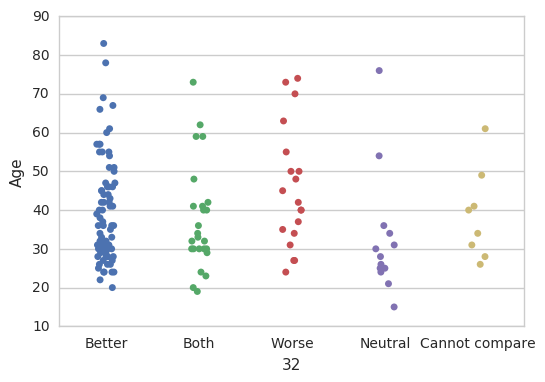

In [147]:
# -------------------------------------------- #
# E - STATS & CORRELATIONS
# -------------------------------------------- #

import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

df_32 = df_people[df_people['32'] != '']
#sns.lmplot('Age', 'Years of studies', data=df_people, fit_reg=False)
#sns.stripplot(x="32", y="Age", data=df_people, jitter=True);
#sns.stripplot(x="32", y="Age", data=df_32, jitter=True);
sns.stripplot(x="32", y="Age", data=df_32, jitter=True);
#sns.swarmplot(x="32", y="Age", hue="Gender", data=df_32)

#heat map ? https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap

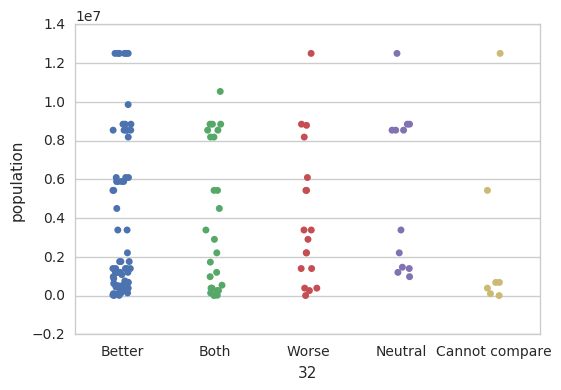

In [154]:
df_32_pop = df_32[ (df_32['population'] != 'Not found') & (df_32['population'] != 'City not found') ]
#df_32_pop['population'].describe()
sns.stripplot(x="32", y="population", data=df_32_pop, jitter=True);

In [112]:
summary32 = df_32.groupby(['32','Gender']).agg({'REF': 'count'})
# % compared to given category of 32
summary32total = summary32.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
# % compared to total
#summary32total = summary32.apply(lambda x:100 * x / float(x.sum()))
summary32total

REF
32             Gender           
Better         F       51.282051
               M       48.717949
Both           F       44.000000
               M       56.000000
Cannot compare F       50.000000
               M       50.000000
Neutral        F       53.846154
               M       46.153846
Worse          F       63.157895
               M       36.842105

In [114]:
continent32 = df_32.groupby(['World Region','32']).agg({'REF': 'count'})
# % compared to given category of 32
continent32total = continent32.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
continent32total

REF
World Region                    32                        
Australia and New Zealand       Both            100.000000
Central Asia                    Worse           100.000000
Eastern Asia                    Better           54.545455
                                Both              9.090909
                                Cannot compare    9.090909
                                Neutral           9.090909
                                Worse            18.181818
Eastern Europe                  Better           62.500000
                                Cannot compare   25.000000
                                Neutral          12.500000
Latin America and the Caribbean Better           67.741935
                                Both             16.129032
                                Worse            16.129032
Northern America                Better           56.666667
                                Both             10.000000
                                Cannot compare   13.333333
                                Neutral          13.333333
                                Worse             6.666667
South-eastern Asia              Better           54.545455
                                Both             18.181818
                                Cannot compare    9.090909
                                Worse            18.181818
Southern Asia                   Better           40.909091
                                Both             31.818182
                                Neutral          13.636364
                                Worse            13.636364
Southern Europe                 Better           50.000000
                                Both             50.000000
Sub-Saharan Africa              Better           50.000000
                                Both             10.000000
                                Neutral          20.000000
                                Worse            20.000000
Western Asia                    Better          100.000000
Western Europe                  Better           41.666667
                                Both             25.000000
                                Neutral          16.666667
                                Worse            16.666667

In [11]:
#test data groupby
test = df_32.groupby(['NumberKidsCategory','32']).size().unstack()

test

32,Better,Both,Cannot compare,Neutral,Worse
NumberKidsCategory,,,,,
0,38.0,15.0,5.0,9.0,9.0
1,9.0,4.0,NaN,3.0,1.0
2-5,31.0,5.0,3.0,1.0,8.0
5+,NaN,1.0,NaN,NaN,1.0


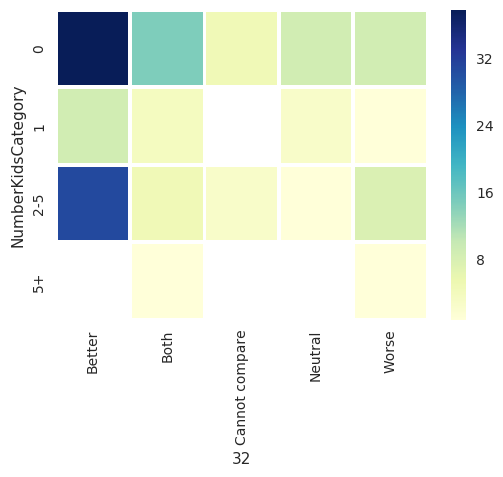

In [12]:
#test heatmap
# with cell annotation with value
# sns.heatmap(test2, annot=True, annot_kws={"size": 7}, linewidths=2, linecolor='white', cmap="YlGnBu")
sns.heatmap(test, linewidths=2, linecolor='white', cmap="YlGnBu")

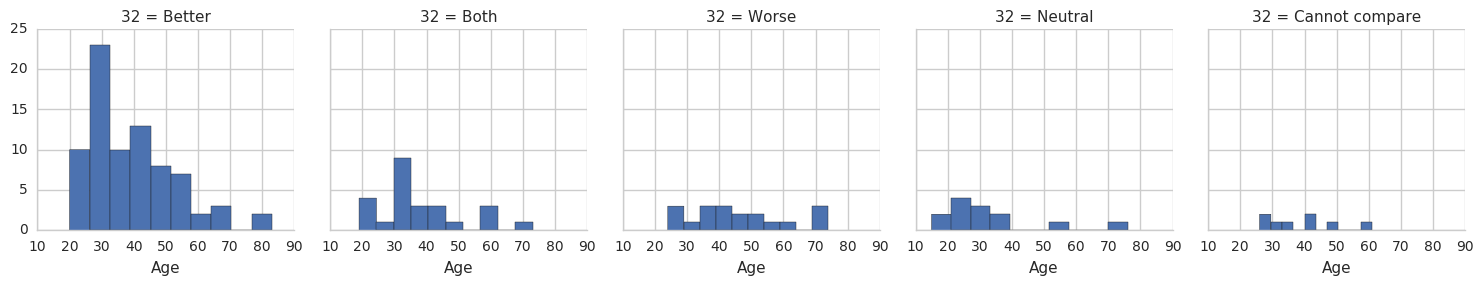

In [13]:
# test small multiples - 1
g = sns.FacetGrid(df_32, col="32")
g.map(plt.hist, "Age");

In [14]:
# test correlation categorical data of Q32 with quantitative data available
#df_32 = df_32.assign('C',df_32['32'].astype('category'))
df_32 = df_32.assign(cat32=df_32['32'].astype('category'))
# better : 10 , both : 5 , worse : 0, neutral & cannot compare > ~5
df_32['cat32'].cat.categories = [10,5,0,5.1,4.9]
df_32['cat32'] = df_32['cat32'].astype('float')
df_32.corr()
#df_32.head()

,Age,Number of kids,Years of studies,cat32
Age,1.000000,0.464230,0.101834,0.014324
Number of kids,0.464230,1.000000,-0.199018,0.010524
Years of studies,0.101834,-0.199018,1.000000,-0.082055
cat32,0.014324,0.010524,-0.082055,1.000000


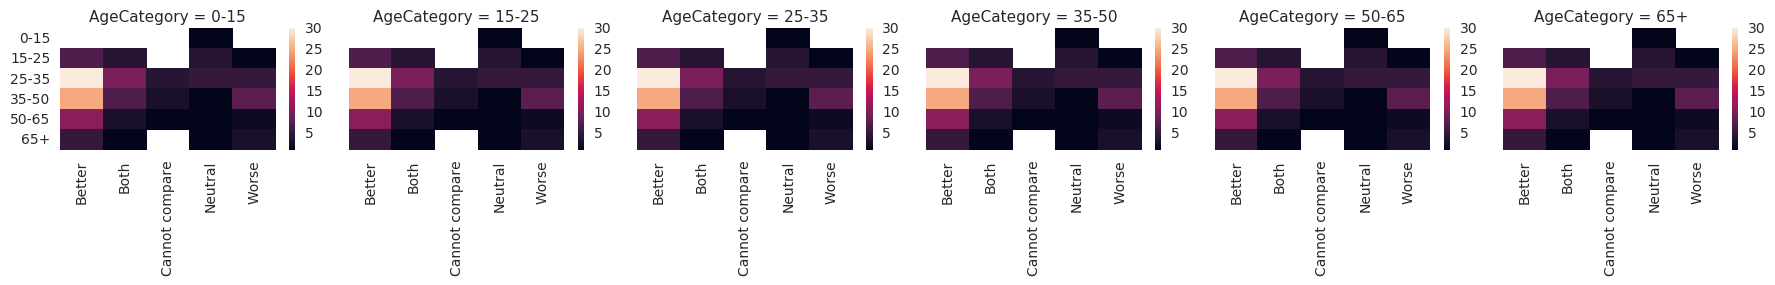

In [15]:
# test small multiples - 2
g = sns.FacetGrid(df_32, col="AgeCategory")
g.map_dataframe(lambda data, color: sns.heatmap( df_32.groupby(['AgeCategory','32']).size().unstack(), linewidths=0))
